In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
df = pd.read_csv('insurance.csv')
#smoker
df.replace(to_replace = 'male',
          value = 1,
          inplace = True)
df.replace(to_replace = 'female',
          value = 0,
          inplace = True)
#smoker
df.replace(to_replace = 'yes',
          value = 1,
          inplace = True)
df.replace(to_replace = 'no',
          value = 0,
          inplace = True)
# region
df.replace(to_replace = 'northeast',
          value = 0,
          inplace = True)
df.replace(to_replace = 'northwest',
          value = 1,
          inplace = True)
df.replace(to_replace = 'southeast',
          value = 2,
          inplace = True)
df.replace(to_replace = 'southwest',
          value = 3,
          inplace = True)

In [3]:
df.head()
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('charges',axis='columns').values)

In [5]:
scaled_y = sy.fit_transform(df['charges'].values.reshape(df.shape[0],1))
scaled_y
scaled_y.reshape(scaled_X.shape[0],)

array([0.25161076, 0.00963595, 0.05311516, ..., 0.00810808, 0.01414352,
       0.44724873])

In [6]:
# MINI BATCH

In [7]:
def mini_batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01, batch_size = 5):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted))
        
        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

def predict(age, sex, bmi, children, smoker, region, w, b):
    scaled_X = sx.transform([[age, sex, bmi, children, smoker, region]])[0]
    scaled_charge = w[0] * scaled_X[0] + w[1] * scaled_X[1] + w[2] * scaled_X[2] + w[3] * scaled_X[3] + w[4] * scaled_X[4] + w[5] * scaled_X[5] + b
    
    return sy.inverse_transform([[scaled_charge]])[0][0]

In [8]:
wMBGD, bMBGD, costMBGD, cost_listMBGD, epoch_listMBGD = mini_batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),scaled_X.shape[0], .05, 10)
wMBGD, bMBGD, costMBGD

(array([ 0.19183267,  0.00172967,  0.1997141 ,  0.04132792,  0.36773891,
        -0.01045874]),
 -0.044760678691096345,
 0.011856475243560408)

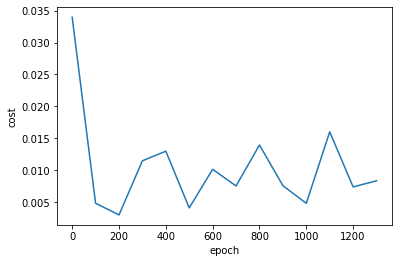

In [9]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_listMBGD,cost_listMBGD)
plt.show()

In [10]:
print(predict(19, 1, 27.9, 0, 1, 3, wMBGD, bMBGD))
print(predict(30, 1, 50.2, 2, 0, 0, wMBGD, bMBGD))
print(predict(33, 1, 22.705, 0, 0, 1, wMBGD, bMBGD))
print(predict(62, 0, 26.29, 0, 1, 2, wMBGD, bMBGD))

25089.51659392696
14122.369322158058
4396.996451989445
35891.8756842661
